<a href="https://colab.research.google.com/github/asu-trans-ai-lab/OSM2GMNS/blob/master/osm2gmns_quickstart_for_Dubai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __OSM2GMNS Quickstart Notebook__

OSM2GMNS is a Python package that helps generate high-fidelity mesoscopic transportation network models from OpenStreetMap data. This enables even the smallest transportation authorities to begin analysis with a high quality network model for future analysis. 


# 1. Data Collection
We rely on a few open-source projects to gather the raw data to start our analysis. Export data from your area of interest from the following sources.
 * __OpenStreetMap base map__: https://www.openstreetmap.org/export
   * __Geofabrik__: Alternative for non-rectangular Areas of Interest: http://download.geofabrik.de/
 * __Bike Transport Info__ (Optional):  https://extract.bbbike.org

For this demonstration, we'll use sample data from the ASU Transit AI Lab Github

osm2gmns also enables users to download OSM data within the region of interest using a built-in function. A region can be a state, city, or even university. On OpenStreetMap homepage, search the region name to get its unique relation id. The following example shows how to download Tempe city OSM data using function downloadOSMData.

https://www.openstreetmap.org/#map=18/33.42141/-111.93472&layers=DG 

# 2. Install the osm2gmns package

In [1]:
!pip install osm2gmns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.3 MB/s eta 0:00:00


# 3. Create a network model from OpenStreetMap exports

In [2]:
# Import osm2gmns with the alias as "og" (easier to type)
import osm2gmns as og
# relation id for Manhattan  is 8398124
# relation id for City of Tempe is 110833.
# relation id for City of Dubai  is 3766483
og.downloadOSMData(3766483, 'map.osm')
# Generate a net from the Tempe, AZ OpenStreetMap export and include Points of Interest (POI=True)


osm2gmns, 0.7.3
valid reponses got from API server.
receving data...
map data has been written to map.osm


arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary')
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 8137, number of links: 10084, number of pois: 0


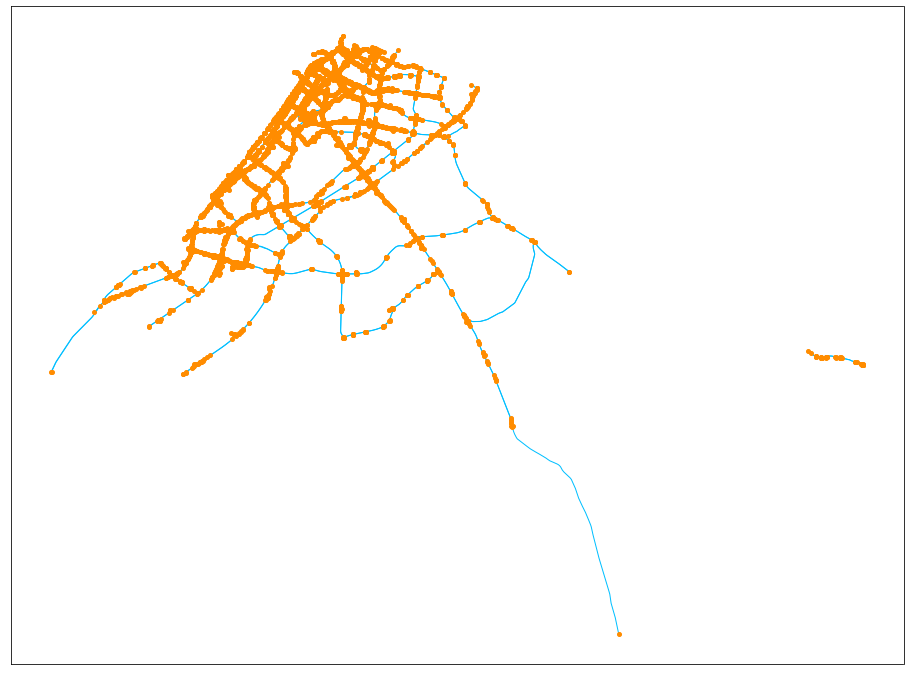

In [3]:
input_file = 'map.osm'
net = og.getNetFromFile(input_file, link_types=('motorway','trunk','primary')) 
# ,'secondary'
# Use og.show(net) to visualize the network model
og.show(net)

**bold text**#4. Export transportation network model

We can export our transportation network model to a CSV format for ease of use in further analysis with other systems. 

og.outputNetToCSV(...) will generate two files: node.csv representing nodes, and link.csv representing links (edges) between nodes.

In [8]:

og.outputNetToCSV(net)

Outputting Network Files


In [9]:
"""
Take a peek at the format of the CSVs using the Pandas library
Loading the CSV files gives us a DataFrame object which is very heavily used in 
data science and analysis. 

For more information on how this data is organized, check out the GMNS specification

https://github.com/zephyr-data-specs/GMNS/pull/54

"""

import pandas as pd

node_dataframe = pd.read_csv("node.csv")
node_dataframe.head()

,name,node_id,osm_node_id,osm_highway,zone_id,ctrl_type,node_type,activity_type,is_boundary,x_coord,y_coord,intersection_id,poi_id,notes
0,NaN,0,90031463,NaN,NaN,NaN,NaN,NaN,NaN,55.365407,25.120153,NaN,NaN,NaN
1,NaN,1,1149158725,NaN,NaN,NaN,NaN,NaN,NaN,55.382421,25.139361,NaN,NaN,NaN
2,NaN,2,10006732394,NaN,NaN,NaN,NaN,NaN,NaN,55.387390,25.150932,NaN,NaN,NaN
3,NaN,3,2330969717,motorway_junction,NaN,NaN,NaN,NaN,NaN,55.387625,25.151455,NaN,NaN,NaN
4,Exit 50,4,95110025,motorway_junction,NaN,NaN,NaN,NaN,NaN,55.388342,25.153183,NaN,NaN,NaN


In [10]:
link_dataframe = pd.read_csv("link.csv")
link_dataframe.head()

,name,link_id,osm_way_id,from_node_id,to_node_id,dir_flag,length,lanes,free_speed,capacity,link_type_name,link_type,geometry,allowed_uses,from_biway,is_link,VDF_fftt1,VDF_cap1
0,شارع الشيخ محمد بن زايد,0,4009554,0,1,1,2771.09,6.0,110.0,NaN,motorway,1,"LINESTRING (55.3654066 25.1201526, 55.3683512 ...",auto,0,0,NaN,NaN
1,شارع الشيخ محمد بن زايد,1,4009554,1,2,1,1375.79,6.0,110.0,NaN,motorway,1,"LINESTRING (55.3824206 25.1393608, 55.3830336 ...",auto,0,0,NaN,NaN
2,شارع الشيخ محمد بن زايد,2,4009554,2,3,1,62.55,6.0,110.0,NaN,motorway,1,"LINESTRING (55.3873900 25.1509321, 55.3876249 ...",auto,0,0,NaN,NaN
3,شارع الشيخ محمد بن زايد,3,4009554,3,4,1,204.50,6.0,110.0,NaN,motorway,1,"LINESTRING (55.3876249 25.1514550, 55.3883417 ...",auto,0,0,NaN,NaN
4,شارع الشيخ محمد بن زايد,4,4009554,4,5,1,1026.51,6.0,110.0,NaN,motorway,1,"LINESTRING (55.3883417 25.1531827, 55.3904814 ...",auto,0,0,NaN,NaN


#5. Basic analysis with Pandas

The node and link files are in CSV format, which can be used with a wide variety of programming languages, such as R, and programs, such as Excel.

Here, we show a quick demonstration of some simple analysis using Python

In [11]:
# From the previous cells, we have pandas DataFrame objects representing the node and link data for our model
print(node_dataframe.head(), link_dataframe.head())

      name  node_id  osm_node_id        osm_highway  zone_id ctrl_type  \
0      NaN        0     90031463                NaN      NaN       NaN   
1      NaN        1   1149158725                NaN      NaN       NaN   
2      NaN        2  10006732394                NaN      NaN       NaN   
3      NaN        3   2330969717  motorway_junction      NaN       NaN   
4  Exit 50        4     95110025  motorway_junction      NaN       NaN   

   node_type  activity_type  is_boundary    x_coord    y_coord  \
0        NaN            NaN          NaN  55.365407  25.120153   
1        NaN            NaN          NaN  55.382421  25.139361   
2        NaN            NaN          NaN  55.387390  25.150932   
3        NaN            NaN          NaN  55.387625  25.151455   
4        NaN            NaN          NaN  55.388342  25.153183   

   intersection_id  poi_id  notes  
0              NaN     NaN    NaN  
1              NaN     NaN    NaN  
2              NaN     NaN    NaN  
3             